# Imports & Visualisation

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
url = 'https://github.com/womega/Covid19_project/blob/master/Training%20and%20tuning/final_dataset.csv?raw=true'
data = pd.read_csv('final_dataset_2.csv')
unlabeled = pd.read_csv('unlabeled_data_nosubdomlvls.csv').drop('Label', axis=1)

In [3]:
data.head()

,Domain,Num_words,Num_chars,Hyphen,Entropy_sdsu,Entropy_nosdsu,Entropy_nosu,Tranco_Rank,Longest_word_ratio,Typos,Freenom_TLD,Other_numbers,Subdomain levels,Label
0,covid19testclassaction.com,7,25,0,3.593270,3.538311,3.538311,0,0.230769,0,0,0,0,1
1,symptomsofcorona-virus.com,5,25,1,3.639080,3.697846,3.697846,0,0.307692,1,0,0,0,1
2,covid19fighter.com,5,17,0,3.734522,3.664498,3.664498,0,0.388889,0,0,0,0,1
3,covid-1nine.com,5,14,1,3.235926,3.095795,3.095795,0,0.266667,0,0,1,0,1
4,latestoncaronavirus.com,6,22,0,3.572624,3.471354,3.471354,0,0.260870,1,0,0,0,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37794 entries, 0 to 37793
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Domain              37794 non-null  object 
 1   Num_words           37794 non-null  int64  
 2   Num_chars           37794 non-null  int64  
 3   Hyphen              37794 non-null  int64  
 4   Entropy_sdsu        37794 non-null  float64
 5   Entropy_nosdsu      37794 non-null  float64
 6   Entropy_nosu        37794 non-null  float64
 7   Tranco_Rank         37794 non-null  int64  
 8   Longest_word_ratio  37794 non-null  float64
 9   Typos               37794 non-null  int64  
 10  Freenom_TLD         37794 non-null  int64  
 11  Other_numbers       37794 non-null  int64  
 12  Subdomain levels    37794 non-null  int64  
 13  Label               37794 non-null  int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 4.0+ MB


## Countplot

Counter({1: 33890, 0: 3904})


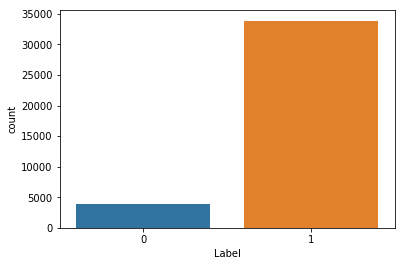

In [5]:
print(Counter(data['Label']))
sns.countplot(data['Label'])

## Histograms

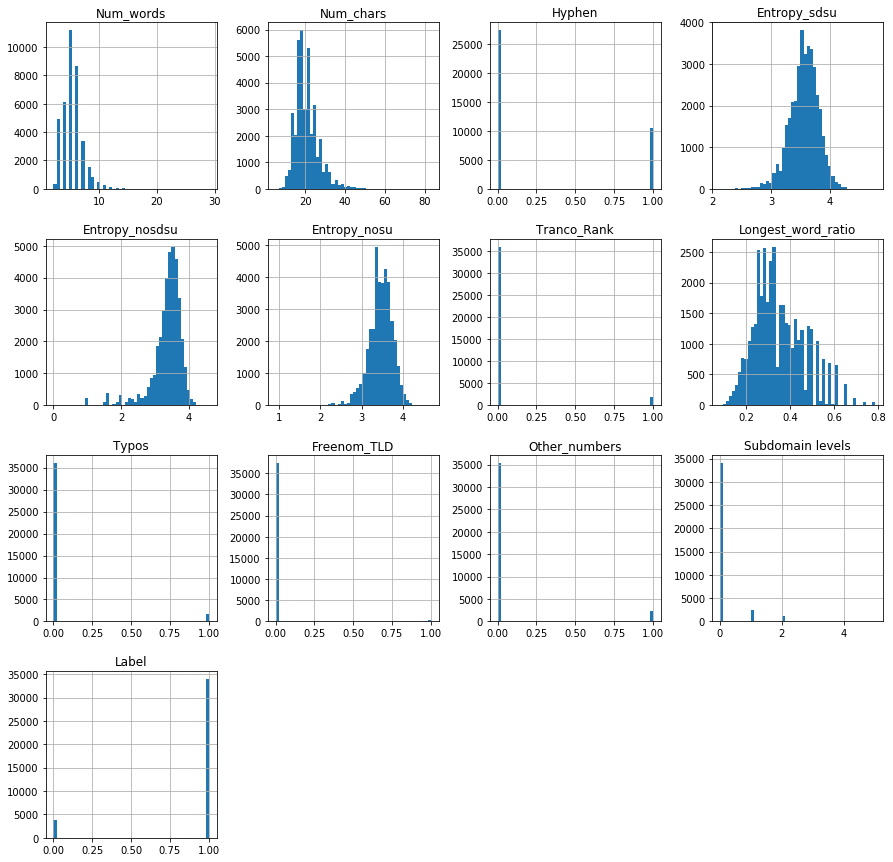

In [6]:
data.hist(bins = 50,figsize = (15,15))
plt.show()

## Correlation heatmap

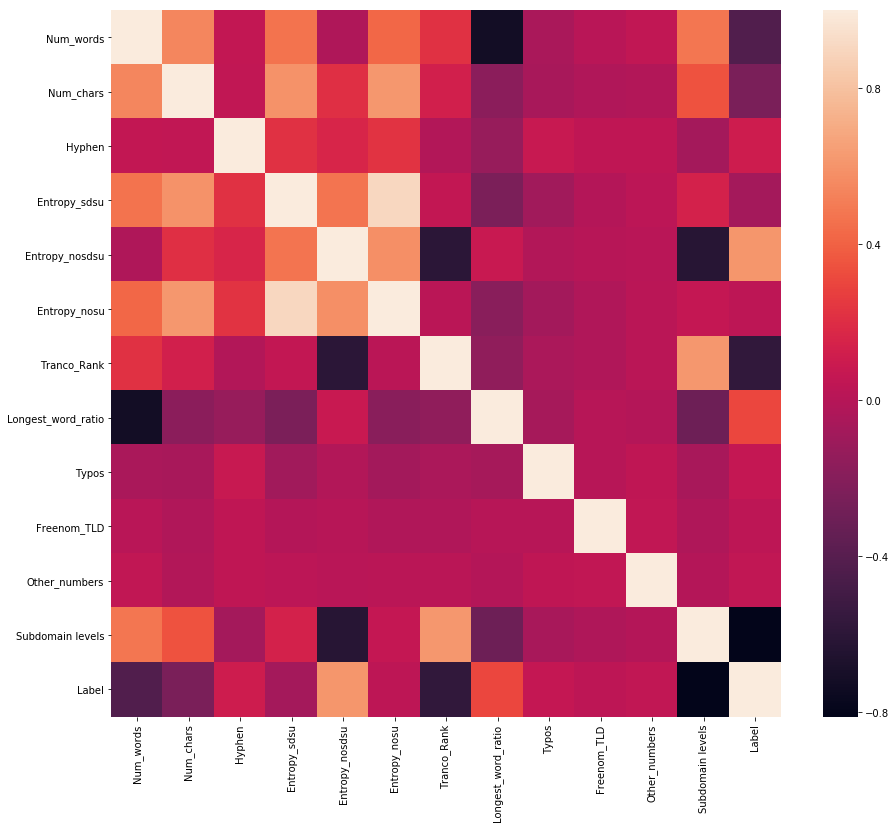

In [7]:
plt.figure(figsize=(15,13))
sns.heatmap(data.corr())
plt.show()

## Decription

In [8]:
data.describe()

,Num_words,Num_chars,Hyphen,Entropy_sdsu,Entropy_nosdsu,Entropy_nosu,Tranco_Rank,Longest_word_ratio,Typos,Freenom_TLD,Other_numbers,Subdomain levels,Label
count,37794.000000,37794.000000,37794.000000,37794.000000,37794.000000,37794.000000,37794.000000,37794.000000,37794.000000,37794.000000,37794.000000,37794.000000,37794.000000
mean,5.322988,20.768164,0.276076,3.558365,3.355477,3.456555,0.046965,0.351469,0.046145,0.009816,0.064508,0.137985,0.896703
std,1.726736,5.936220,0.447061,0.243522,0.459343,0.284065,0.211567,0.115365,0.209802,0.098591,0.245658,0.457127,0.304350
min,2.000000,5.000000,0.000000,2.121928,-0.000000,0.918296,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,17.000000,0.000000,3.410417,3.238901,3.288320,0.000000,0.266667,0.000000,0.000000,0.000000,0.000000,1.000000
50%,5.000000,20.000000,0.000000,3.572469,3.452820,3.471354,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,1.000000
75%,6.000000,24.000000,1.000000,3.725481,3.625000,3.642150,0.000000,0.423077,0.000000,0.000000,0.000000,0.000000,1.000000
max,29.000000,83.000000,1.000000,4.762261,4.582450,4.667995,1.000000,0.785714,1.000000,1.000000,1.000000,5.000000,1.000000


# Preprocessing

In [9]:
X = data.drop(['Domain', 'Label', 'Subdomain levels'], axis=1)
y = data['Label']

In [10]:
X.shape, y.shape

((37794, 11), (37794,))

In [11]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['black', 'red']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
        sns.despine()
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

## Oversampling

### Random oversampling

In [23]:
mu, sigma = 0, 0.1 
noise = np.random.normal(mu, sigma, X.shape)
X_noisy = X + noise

In [24]:
from imblearn.over_sampling import RandomOverSampler

X_over, y_over = RandomOverSampler().fit_sample(X_noisy, y)

# Algorithms

In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, confusion_matrix, make_scorer
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn import tree
import graphviz

In [26]:
def specificity(y_true, y_pred): 
    tn = confusion_matrix(y_true, y_pred)[0, 0]
    fp = confusion_matrix(y_true, y_pred)[0, 1]
    neg = tn + fp
    return tn/neg

#scoring = {'f1', 'precision','accuracy', 'recall', make_scorer(specificity)}

scoring = {'f1': 'f1', 'precision': 'precision', 'accuracy': 'accuracy',
           'sensitivity': 'recall', 'specificity': make_scorer(specificity)}

In [27]:
def append_avgs(dict):
    avgs = []
    stds = []
    for i in dict:
        avg = np.average(dict[i])
        std = np.std(dict[i])
        avgs.append(avg)
        stds.append(std)
    df = pd.DataFrame(dict)
    df.loc[10] = avgs
    df.loc[11] = stds
    return df

def compare_avgs(df1, df2):
    avg_df1 = get_avg(df1)
    avg_df2 = get_avg(df2)
    # avg_ovu = get_avg(ovr_und)
    df = pd.concat([avg_df1, avg_df2], ignore_index=True)
    return df


def get_avg(df):
    # print(df.iloc[[10]].reset_index(drop=True))
    return df.iloc[[10]].reset_index(drop=True)

def draw(dict):
    folds = list(range(0,10))
    plt.figure(figsize=(20,10))
    plt.grid(True)
    plt.plot(folds,dict['test_accuracy'][:10],label='accuracy',marker='o', linestyle='--',)
    plt.plot(folds,dict['test_precision'][:10],label = 'precision',marker='o', linestyle='--',)
    plt.plot(folds,dict['test_f1'][:10],label = 'f1 score',marker='o', linestyle='--',)
    plt.plot(folds,dict['test_sensitivity'][:10],label='Recall',marker='o', linestyle='--',)
    plt.plot(folds,dict['test_specificity'][:10],label='Specificity',marker='o', linestyle='--',)
    plt.xlabel('Fold')
    plt.ylabel('Performance')
    plt.xticks(folds, folds)
    plt.legend()
    plt.show()

## Decision Tree

In [28]:
# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

In [29]:
# idx = np.arrange(y.shape[0])
# X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_nearmiss, y_nearmiss, idx, stratify = y, test_size=0.333333, random_state=100)

In [30]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_over, y_over, test_size=0.333333, random_state=100)

### Baseline

#### Previously Overrsampled

H:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
H:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


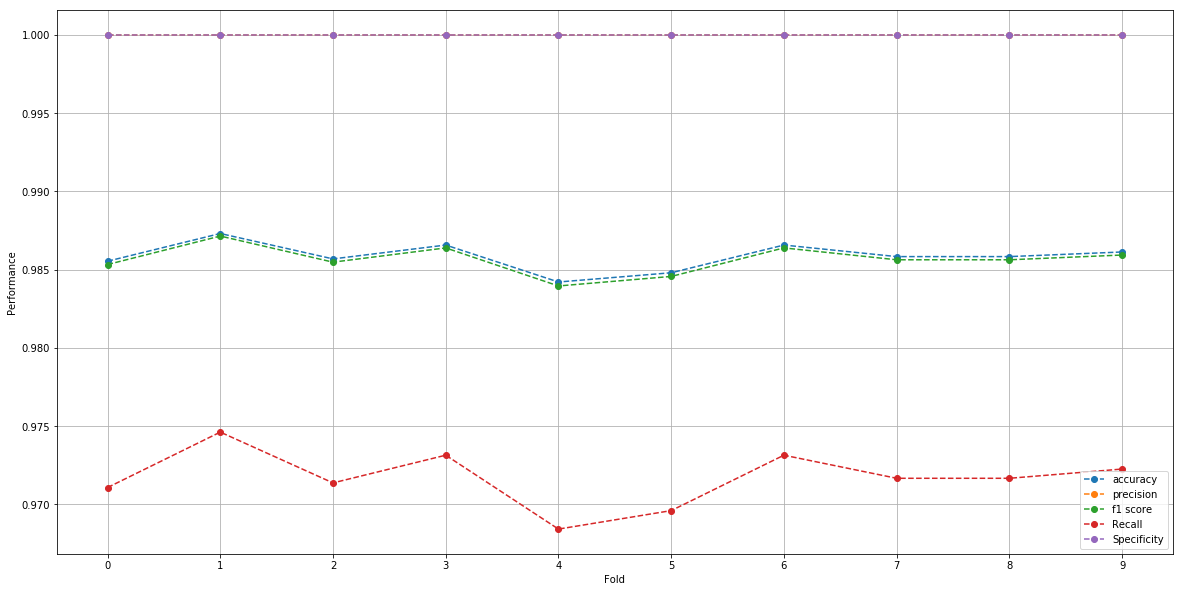

In [31]:
clf = make_pipeline(StandardScaler(), DecisionTreeClassifier())
dtc_sc_pr = cross_validate(clf, X_over, y_over, cv=10, scoring=scoring)
dtc_sc_pr = append_avgs(dtc_sc_pr)
draw(dtc_sc_pr)

In [32]:
dtc_sc_pr

,fit_time,score_time,test_f1,test_precision,test_accuracy,test_sensitivity,test_specificity
0,1.959874,0.055967,0.985329,1.0,0.985541,0.971083,1.0
1,1.997853,0.050971,0.987149,1.0,0.987312,0.974624,1.0
2,1.785974,0.052969,0.985481,1.0,0.985689,0.971378,1.0
3,1.799966,0.049975,0.986392,1.0,0.986574,0.973148,1.0
4,1.821953,0.052969,0.983960,1.0,0.984214,0.968427,1.0
5,1.879914,0.028983,0.984569,1.0,0.984804,0.969608,1.0
6,1.570100,0.053967,0.986392,1.0,0.986574,0.973148,1.0
7,1.927891,0.043975,0.985633,1.0,0.985837,0.971673,1.0
8,1.777978,0.052970,0.985633,1.0,0.985837,0.971673,1.0
9,1.847936,0.050971,0.985937,1.0,0.986132,0.972263,1.0


##### Single Model

In [33]:
# instantiate the model 
dtc = make_pipeline(StandardScaler(), DecisionTreeClassifier())
# fit the model 

dtc.fit(X_train_1, y_train_1)

dtc_test_pred = dtc.predict(X_test_1)

print("The DTC's classification report:\n\n",classification_report(y_test_1, dtc_test_pred))
print("The DTC's confusion matrix:\n\n",confusion_matrix(y_test_1, dtc_test_pred))
print("Recall: ", recall_score(y_test_1, dtc_test_pred))
print("Accuracy: ", accuracy_score(y_test_1, dtc_test_pred))
print("Specificity: ", specificity(y_test_1, dtc_test_pred))
print("F-1: ", f1_score(y_test_1, dtc_test_pred))

The DTC's classification report:

               precision    recall  f1-score   support

           0       0.97      1.00      0.98     11362
           1       1.00      0.97      0.98     11232

    accuracy                           0.98     22594
   macro avg       0.98      0.98      0.98     22594
weighted avg       0.98      0.98      0.98     22594

The DTC's confusion matrix:

 [[11358     4]
 [  391 10841]]
Recall:  0.9651887464387464
Accuracy:  0.9825174825174825
Specificity:  0.9996479493046999
F-1:  0.98210807627848


In [34]:
dtc_preds = dtc.predict(unlabeled)

In [ ]:
dot_data = tree.export_graphviz(dtc, out_file=None,
                                feature_names=X.columns,
                                class_names=["whitelist","malicious"],
                                filled=True, rounded=True, 
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
#graph.render('test-output/decision_tree1.gv', view=True)

In [ ]:
graph

###### Feature importance

In [ ]:
importances = dtc.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [27]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size = 0.33, random_state=42)

In [31]:
# build normal model
pipeline = make_pipeline(DecisionTreeClassifier())
model = pipeline.fit(X_train_2, y_train_2)
prediction = model.predict(X_test_2)

# build model with undersampling
nearmiss_pipeline = make_pipeline_imb(NearMiss(sampling_strategy=0.25), DecisionTreeClassifier())
nearmiss_model = nearmiss_pipeline.fit(X_train_2, y_train_2)
nearmiss_prediction = nearmiss_model.predict(X_test_2)

In [32]:
from imblearn.metrics import classification_report_imbalanced

In [33]:
print(classification_report_imbalanced(y_test_2, nearmiss_prediction))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.65      0.89      0.95      0.75      0.92      0.84      1229
          1       0.99      0.95      0.89      0.97      0.92      0.85     11244

avg / total       0.95      0.94      0.90      0.95      0.92      0.85     12473



In [34]:
print(accuracy_score(y_test_2, nearmiss_prediction))

0.9415537561132046


#### Oversampled in pipeline

In [35]:
clf = make_pipeline_imb(RandomOverSampler(), StandardScaler(), DecisionTreeClassifier())
dtc_sc = cross_validate(clf, X_noisy, y, cv=10, scoring=scoring)
dtc_sc = append_avgs(dtc_sc)

H:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
H:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


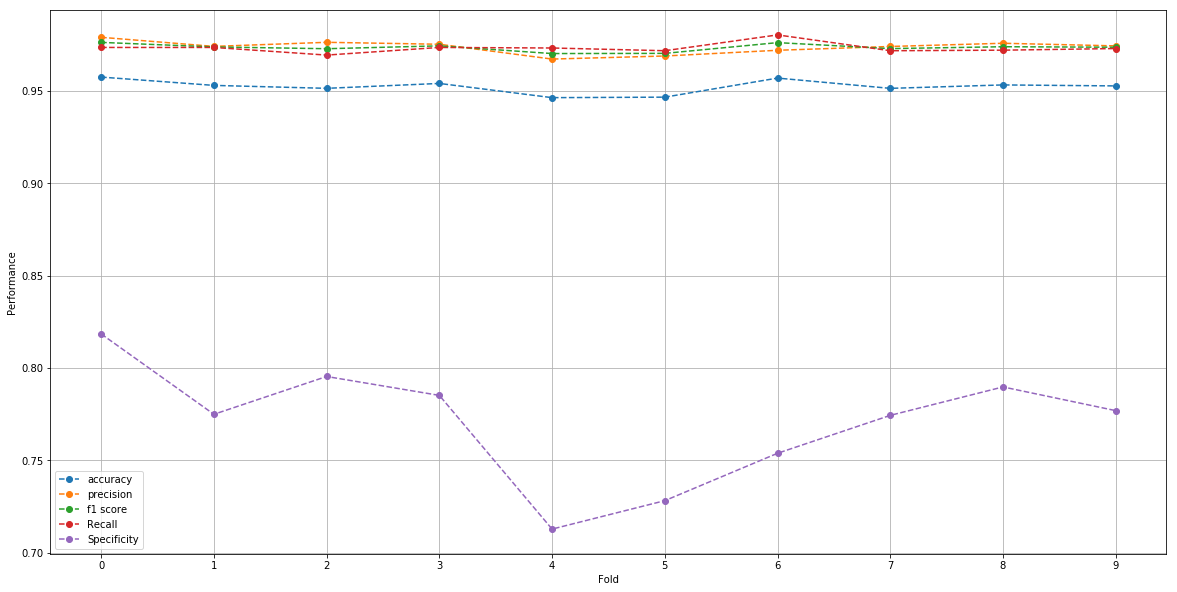

In [36]:
draw(dtc_sc)

#### Compare averages

In [37]:
compare_avgs(dtc_sc, dtc_sc_pr)

,fit_time,score_time,test_f1,test_precision,test_accuracy,test_sensitivity,test_specificity
0,1.720210,0.031981,0.973364,0.97362,0.952241,0.973119,0.770981
1,1.836944,0.049372,0.985647,1.00000,0.985851,0.971703,1.000000


## Random Forest

In [38]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

### Baseline

#### Previously Undersampled

H:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
H:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


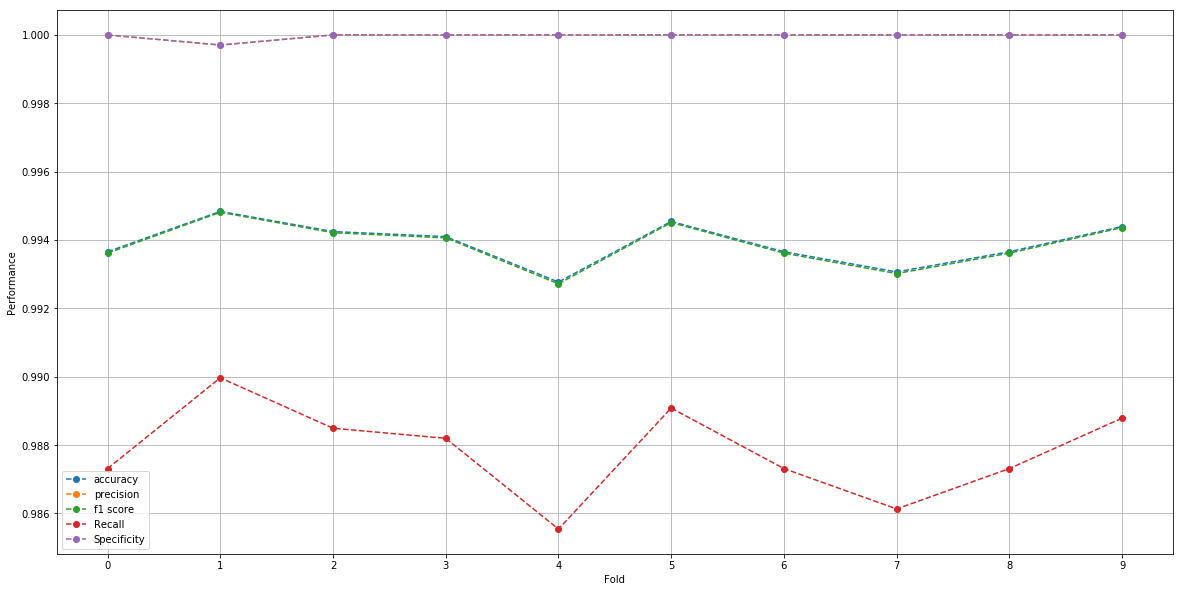

In [39]:
clf = make_pipeline(StandardScaler(), RandomForestClassifier())
rfc_sc_pr = cross_validate(clf, X_over, y_over, cv=10, scoring=scoring)
rfc_sc_pr = append_avgs(rfc_sc_pr)
draw(rfc_sc_pr)

In [40]:
rfc_sc_pr

,fit_time,score_time,test_f1,test_precision,test_accuracy,test_sensitivity,test_specificity
0,21.753505,0.216874,0.993615,1.000000,0.993656,0.987312,1.000000
1,24.434965,0.194887,0.994811,0.999702,0.994836,0.989968,0.999705
2,24.589875,0.206883,0.994213,1.000000,0.994246,0.988492,1.000000
3,23.306612,0.196889,0.994064,1.000000,0.994099,0.988197,1.000000
4,24.337021,0.189889,0.992718,1.000000,0.992771,0.985541,1.000000
5,23.095734,0.188890,0.994511,1.000000,0.994541,0.989082,1.000000
6,22.370151,0.181895,0.993615,1.000000,0.993656,0.987312,1.000000
7,23.049759,0.190892,0.993017,1.000000,0.993066,0.986132,1.000000
8,21.812468,0.187893,0.993615,1.000000,0.993656,0.987312,1.000000
9,22.093311,0.189889,0.994362,1.000000,0.994394,0.988787,1.000000


##### Single Model

In [41]:
# instantiate the model 
rfc = make_pipeline(StandardScaler(), RandomForestClassifier())
# fit the model 

rfc.fit(X_train_1, y_train_1)

rfc_test_pred = rfc.predict(X_test_1)

print("The RFC's classification report:\n\n",classification_report(y_test_1, rfc_test_pred))
print("The RFC's confusion matrix:\n\n",confusion_matrix(y_test_1, rfc_test_pred))
print("Recall: ", recall_score(y_test_1, rfc_test_pred))
print("Accuracy: ", accuracy_score(y_test_1, rfc_test_pred))
print("Specificity: ", specificity(y_test_1, rfc_test_pred))
print("F-1: ", f1_score(y_test_1, rfc_test_pred))

The RFC's classification report:

               precision    recall  f1-score   support

           0       0.98      1.00      0.99     11362
           1       1.00      0.98      0.99     11232

    accuracy                           0.99     22594
   macro avg       0.99      0.99      0.99     22594
weighted avg       0.99      0.99      0.99     22594

The RFC's confusion matrix:

 [[11362     0]
 [  174 11058]]
Recall:  0.9845085470085471
Accuracy:  0.9922988404001062
Specificity:  1.0
F-1:  0.9921938088829072


In [42]:
rfc_preds = rfc.predict(unlabeled)

###### Feature importance

Feature ranking:
1. Entropy_nosdsu (0.382903)
2. Tranco_Rank (0.140803)
3. Num_words (0.121947)
4. Entropy_nosu (0.097573)
5. Num_chars (0.094598)
6. Longest_word_ratio (0.079891)
7. Entropy_sdsu (0.068514)
8. Other_numbers (0.005783)
9. Hyphen (0.005593)
10. Typos (0.002395)
11. Freenom_TLD (0.000000)


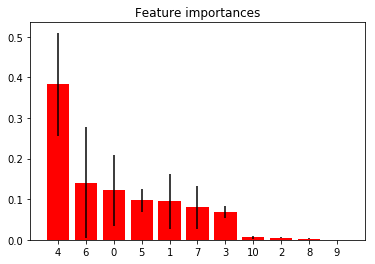

In [38]:
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

#### Oversampled in pipeline

In [43]:
clf = make_pipeline_imb(RandomOverSampler(), StandardScaler(), RandomForestClassifier())
rfc_sc = cross_validate(clf, X_noisy, y, cv=10, scoring=scoring)
rfc_sc = append_avgs(rfc_sc)

H:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
H:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


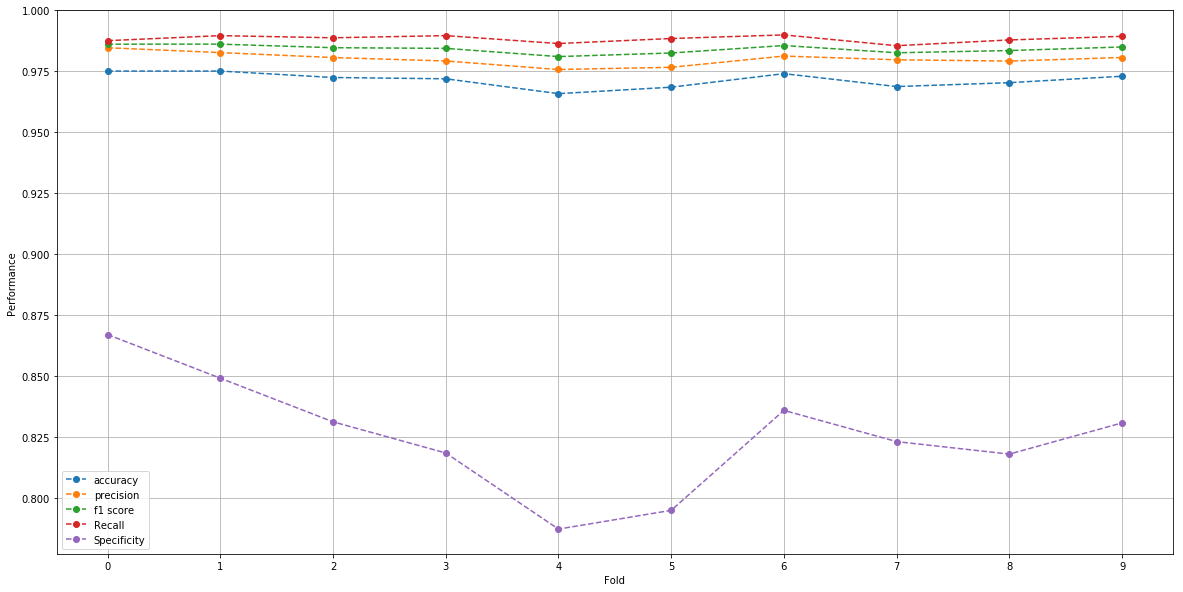

In [44]:
draw(rfc_sc)

#### Compare averages

In [45]:
compare_avgs(rfc_sc, rfc_sc_pr)

,fit_time,score_time,test_f1,test_precision,test_accuracy,test_sensitivity,test_specificity
0,22.241139,0.122830,0.984193,0.980079,0.971530,0.988345,0.825547
1,23.084340,0.194488,0.993854,0.999970,0.993892,0.987814,0.999970


## XGBoost

In [46]:
# XGboost classifier
from xgboost import XGBClassifier, plot_importance

H:\Anaconda3\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
H:\Anaconda3\lib\site-packages\distributed\config.py:63: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config.update(yaml.load(text) or {})


### Baseline

#### Previously Undersampled

H:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
H:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


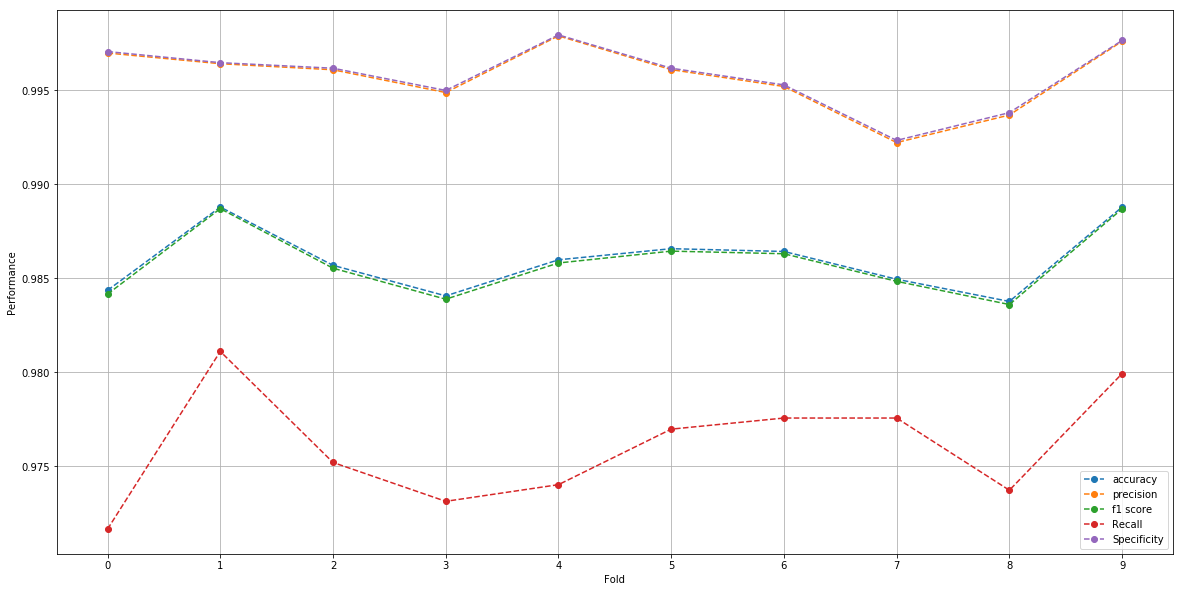

In [47]:
clf = make_pipeline(StandardScaler(), XGBClassifier())
xgb_sc_pr = cross_validate(clf, X_over, y_over, cv=10, scoring=scoring)
xgb_sc_pr = append_avgs(xgb_sc_pr)
draw(xgb_sc_pr)

In [48]:
xgb_sc_pr

,fit_time,score_time,test_f1,test_precision,test_accuracy,test_sensitivity,test_specificity
0,6.388330,0.074957,0.984160,0.996972,0.984361,0.971673,0.997049
1,6.485275,0.072958,0.988701,0.996404,0.988787,0.981115,0.996459
2,7.947436,0.080954,0.985537,0.996082,0.985689,0.975214,0.996164
3,8.389181,0.080953,0.983890,0.994872,0.984066,0.973148,0.994984
4,9.963277,0.083951,0.985815,0.997884,0.985984,0.974034,0.997934
5,7.761541,0.072958,0.986444,0.996089,0.986574,0.976984,0.996164
6,7.493697,0.081951,0.986305,0.995194,0.986427,0.977575,0.995279
7,5.840644,0.068960,0.984839,0.992213,0.984951,0.977575,0.992328
8,6.295384,0.072958,0.983607,0.993677,0.983771,0.973739,0.993803
9,6.494270,0.077955,0.988687,0.997597,0.988787,0.979935,0.997639


##### Single Model

In [49]:
# instantiate the model 
xgb = make_pipeline(StandardScaler(), XGBClassifier())
# fit the model 

xgb.fit(X_train_1, y_train_1)

xgb_test_pred = rfc.predict(X_test_1)

print("The XGB's classification report:\n\n",classification_report(y_test_1, xgb_test_pred))
print("The XGB's confusion matrix:\n\n",confusion_matrix(y_test_1, xgb_test_pred))
print("Recall: ", recall_score(y_test_1, xgb_test_pred))
print("Accuracy: ", accuracy_score(y_test_1, xgb_test_pred))
print("Specificity: ", specificity(y_test_1, xgb_test_pred))
print("F-1: ", f1_score(y_test_1, xgb_test_pred))

The XGB's classification report:

               precision    recall  f1-score   support

           0       0.98      1.00      0.99     11362
           1       1.00      0.98      0.99     11232

    accuracy                           0.99     22594
   macro avg       0.99      0.99      0.99     22594
weighted avg       0.99      0.99      0.99     22594

The XGB's confusion matrix:

 [[11362     0]
 [  174 11058]]
Recall:  0.9845085470085471
Accuracy:  0.9922988404001062
Specificity:  1.0
F-1:  0.9921938088829072


In [50]:
xgb_preds = xgb.predict(unlabeled)

###### Feature importance

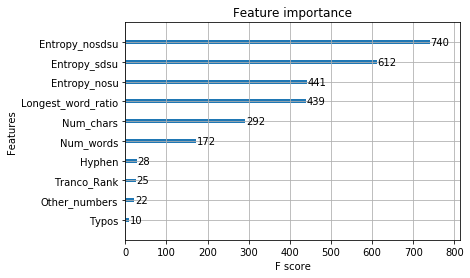

In [44]:
plot_importance(xgb)

Feature ranking:
1. Tranco_Rank (0.377101)
2. Num_words (0.208959)
3. Entropy_nosdsu (0.159639)
4. Entropy_nosu (0.073894)
5. Typos (0.047118)
6. Other_numbers (0.040552)
7. Hyphen (0.028086)
8. Num_chars (0.024492)
9. Entropy_sdsu (0.022992)
10. Longest_word_ratio (0.017167)
11. Freenom_TLD (0.000000)


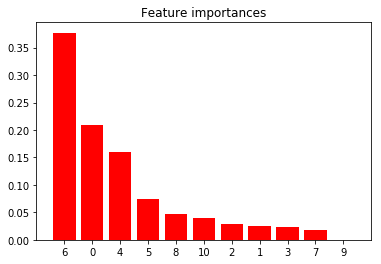

In [45]:
importances = xgb.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

#### Undersampled in pipeline

H:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
H:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


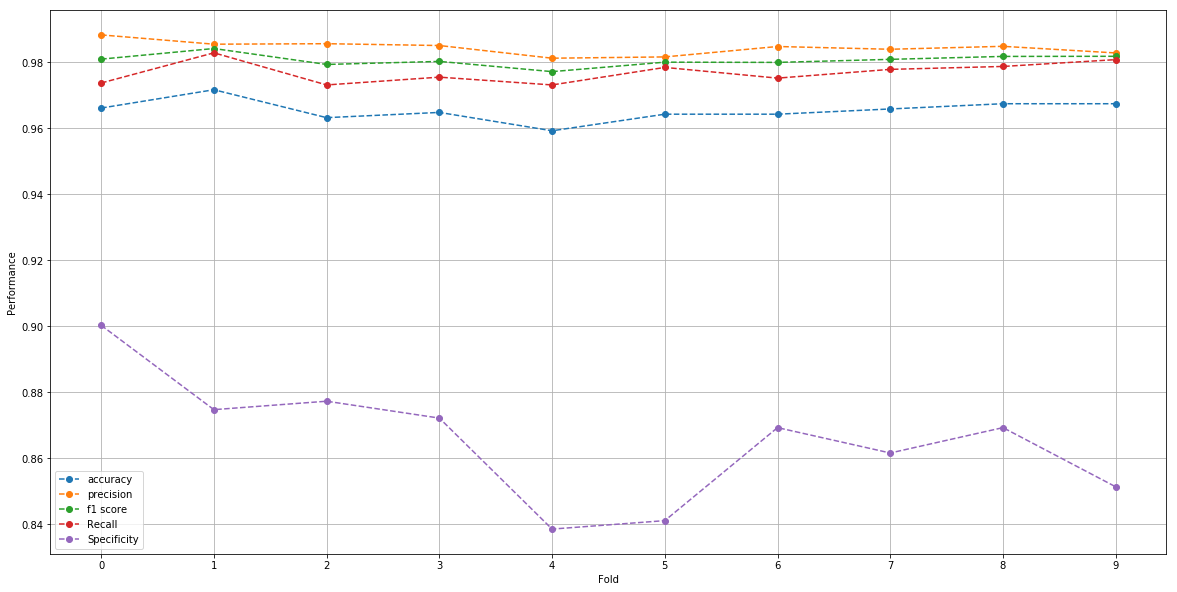

In [51]:
clf = make_pipeline_imb(RandomOverSampler(), StandardScaler(), XGBClassifier())
xgb_sc = cross_validate(clf, X_noisy, y, cv=10, scoring=scoring)
xgb_sc = append_avgs(xgb_sc)

draw(xgb_sc)

#### Compare averages

In [52]:
compare_avgs(xgb_sc, xgb_sc_pr)

,fit_time,score_time,test_f1,test_precision,test_accuracy,test_sensitivity,test_specificity
0,6.230824,0.049172,0.980657,0.984396,0.965444,0.976955,0.865507
1,7.305904,0.076855,0.985799,0.995698,0.985940,0.976099,0.995780


## GBC

In [53]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

### Baseline

#### Previously Undersampled

H:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
H:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


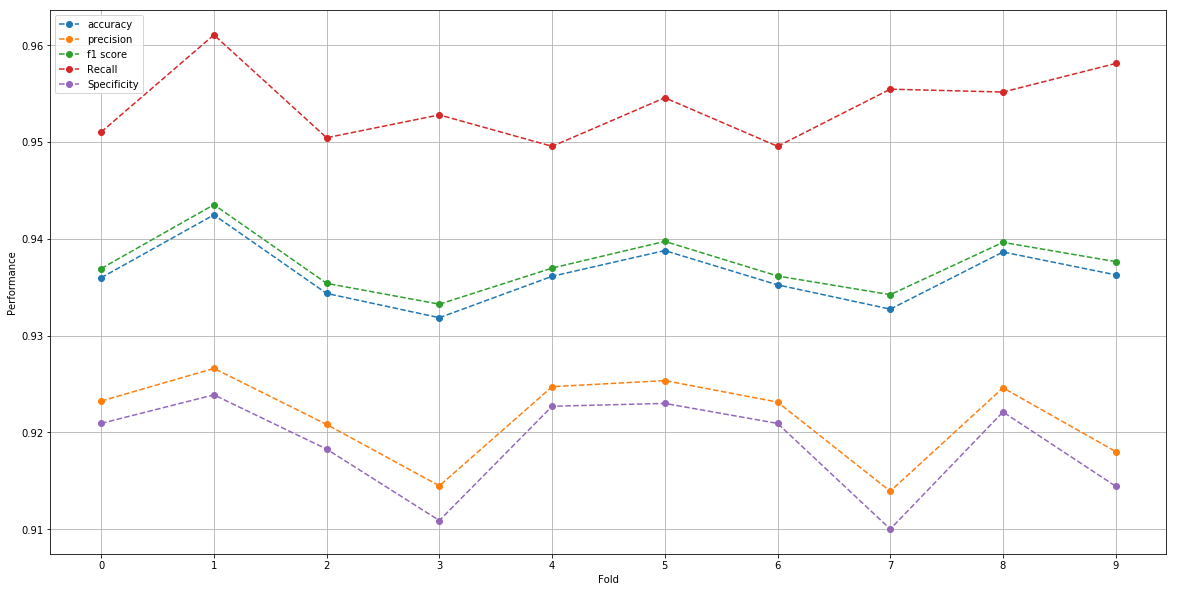

In [54]:
clf = make_pipeline(StandardScaler(), GradientBoostingClassifier())
gb_sc_pr = cross_validate(clf, X_over, y_over, cv=10, scoring=scoring)
gb_sc_pr = append_avgs(gb_sc_pr)
draw(gb_sc_pr)

In [55]:
gb_sc_pr

,fit_time,score_time,test_f1,test_precision,test_accuracy,test_sensitivity,test_specificity
0,28.402816,0.048972,0.936919,0.923231,0.935969,0.951018,0.920921
1,29.531037,0.048970,0.943511,0.926600,0.942461,0.961050,0.923871
2,29.073302,0.052970,0.935386,0.920812,0.934346,0.950428,0.918265
3,29.326154,0.051971,0.933237,0.914472,0.931838,0.952788,0.910888
4,29.378150,0.046964,0.936963,0.924713,0.936117,0.949543,0.922691
5,30.178665,0.043974,0.939724,0.925343,0.938772,0.954559,0.922986
6,28.970362,0.042972,0.936145,0.923121,0.935232,0.949543,0.920921
7,28.872413,0.059965,0.934218,0.913915,0.932724,0.955444,0.910003
8,29.368135,0.044972,0.939623,0.924593,0.938625,0.955149,0.922101
9,29.260190,0.046975,0.937626,0.918010,0.936264,0.958100,0.914429


##### Single Model

In [56]:
# instantiate the model 
gbc = make_pipeline(StandardScaler(), GradientBoostingClassifier())
# fit the model 

gbc.fit(X_train_1, y_train_1)

gbc_test_pred = gbc.predict(X_test_1)

print("The GBC's classification report:\n\n",classification_report(y_test_1, gbc_test_pred))
print("The GBC's confusion matrix:\n\n",confusion_matrix(y_test_1, gbc_test_pred))
print("Recall: ", recall_score(y_test_1, gbc_test_pred))
print("Accuracy: ", accuracy_score(y_test_1, gbc_test_pred))
print("Specificity: ", specificity(y_test_1, gbc_test_pred))
print("F-1: ", f1_score(y_test_1, gbc_test_pred))

The GBC's classification report:

               precision    recall  f1-score   support

           0       0.95      0.92      0.94     11362
           1       0.92      0.95      0.94     11232

    accuracy                           0.94     22594
   macro avg       0.94      0.94      0.94     22594
weighted avg       0.94      0.94      0.94     22594

The GBC's confusion matrix:

 [[10442   920]
 [  520 10712]]
Recall:  0.9537037037037037
Accuracy:  0.9362662653801894
Specificity:  0.9190283400809717
F-1:  0.9370188943317005


In [57]:
gbc_preds = gbc.predict(unlabeled)

###### Feature importance

Feature ranking:
1. Entropy_nosdsu (0.598842)
2. Entropy_nosu (0.164506)
3. Num_words (0.140546)
4. Tranco_Rank (0.033561)
5. Num_chars (0.021588)
6. Entropy_sdsu (0.020052)
7. Longest_word_ratio (0.015650)
8. Other_numbers (0.003830)
9. Typos (0.001167)
10. Hyphen (0.000258)
11. Freenom_TLD (0.000000)


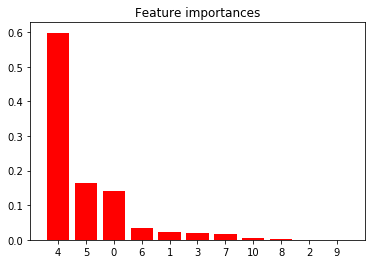

In [50]:
importances = gbc.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

#### Undersampled in pipeline

H:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
H:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


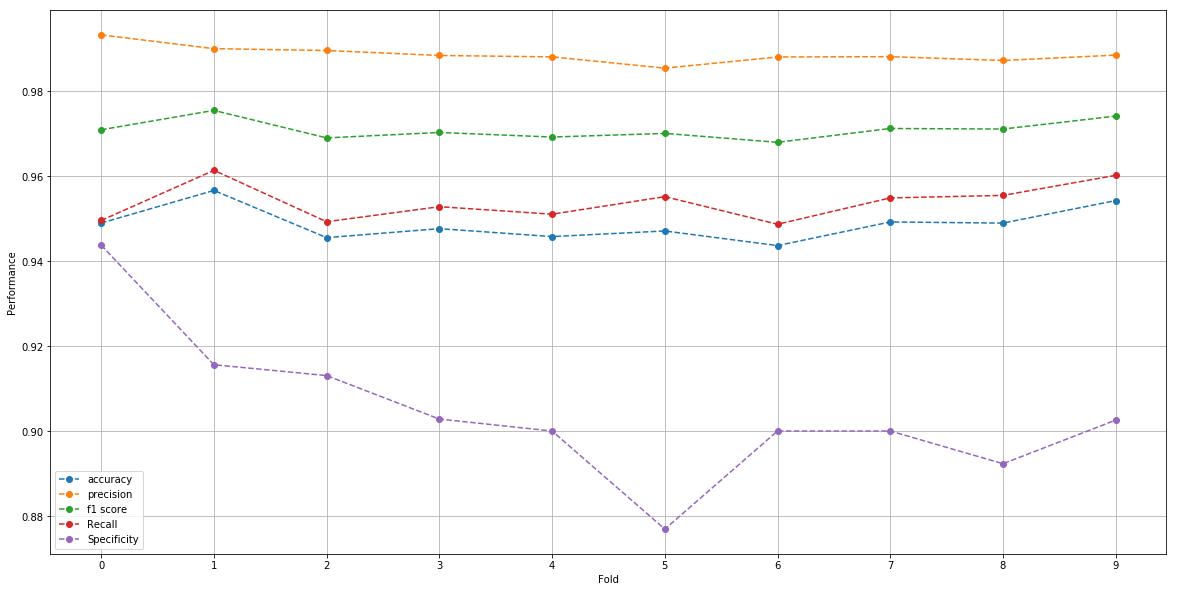

In [58]:
clf = make_pipeline_imb(RandomOverSampler(), StandardScaler(), GradientBoostingClassifier())
gb_sc = cross_validate(clf, X_noisy, y, cv=10, scoring=scoring)
gb_sc = append_avgs(gb_sc)

draw(gb_sc)

#### Compare averages

In [59]:
compare_avgs(gb_sc, gb_sc_pr)

,fit_time,score_time,test_f1,test_precision,test_accuracy,test_sensitivity,test_specificity
0,31.836812,0.033481,0.970906,0.988628,0.948748,0.953821,0.904699
1,29.236122,0.048871,0.937335,0.921481,0.936235,0.953762,0.918708


## Perceptrons

In [60]:
from sklearn.neural_network import MLPClassifier

### Baseline

#### Previously Undersampled

H:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
H:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
H:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
H:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
H:\Anaconda3\lib\site-packages\s

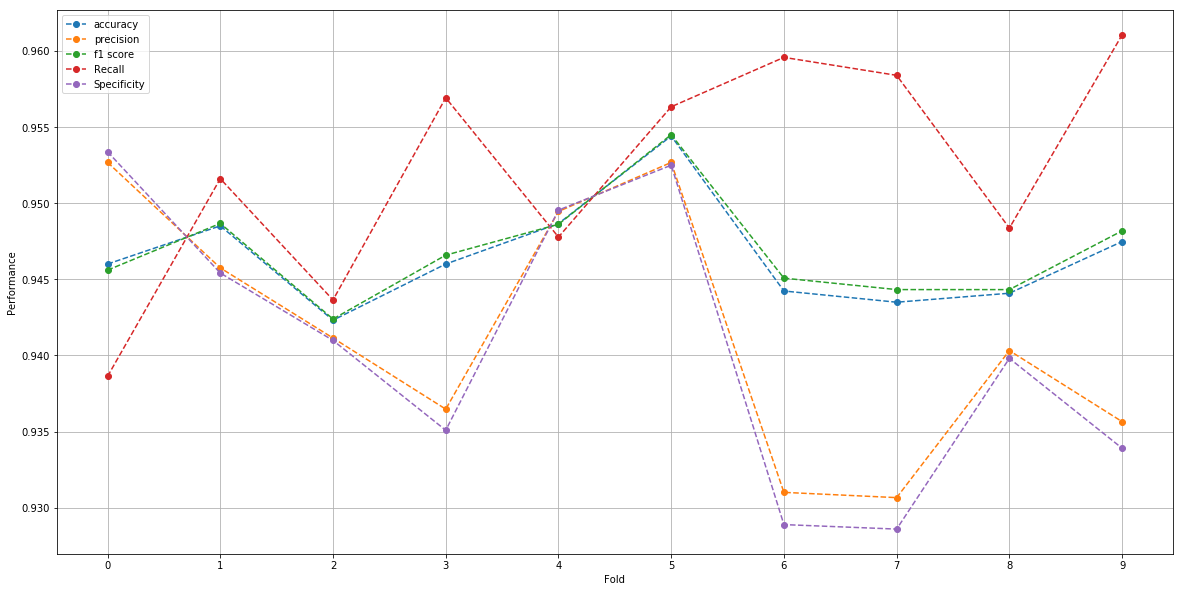

In [61]:
clf = make_pipeline(StandardScaler(), MLPClassifier())
mlp_sc_pr = cross_validate(clf, X_over, y_over, cv=10, scoring=scoring)
mlp_sc_pr = append_avgs(mlp_sc_pr)
draw(mlp_sc_pr)

In [62]:
mlp_sc_pr

,fit_time,score_time,test_f1,test_precision,test_accuracy,test_sensitivity,test_specificity
0,120.828809,0.066960,0.945600,0.952680,0.946002,0.938625,0.953379
1,116.510220,0.053985,0.948669,0.945748,0.948510,0.951608,0.945412
2,120.213948,0.058949,0.942390,0.941142,0.942313,0.943641,0.940986
3,120.641706,0.053980,0.946585,0.936471,0.946002,0.956919,0.935084
4,118.750775,0.059979,0.948612,0.949453,0.948657,0.947772,0.949543
5,120.769008,0.046957,0.954499,0.952675,0.954411,0.956329,0.952493
6,111.783716,0.047989,0.945074,0.931005,0.944231,0.959575,0.928888
7,110.374814,0.046978,0.944323,0.930659,0.943494,0.958395,0.928593
8,111.841388,0.049973,0.944322,0.940316,0.944084,0.948362,0.939805
9,110.543750,0.045979,0.948180,0.935651,0.947477,0.961050,0.933904


##### Single Model

In [63]:
# instantiate the model 
mlp = make_pipeline(StandardScaler(), MLPClassifier())
# fit the model 

mlp.fit(X_train_1, y_train_1)

mlp_test_pred = mlp.predict(X_test_1)

print("The MLP's classification report:\n\n", classification_report(y_test_1, mlp_test_pred))
print("The MLP's confusion matrix:\n\n", confusion_matrix(y_test_1, mlp_test_pred))
print("Recall: ", recall_score(y_test_1, mlp_test_pred))
print("Accuracy: ", accuracy_score(y_test_1, mlp_test_pred))
print("Specificity: ", specificity(y_test_1, mlp_test_pred))
print("F-1: ", f1_score(y_test_1, mlp_test_pred))

H:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


The MLP's classification report:

               precision    recall  f1-score   support

           0       0.95      0.95      0.95     11362
           1       0.95      0.94      0.95     11232

    accuracy                           0.95     22594
   macro avg       0.95      0.95      0.95     22594
weighted avg       0.95      0.95      0.95     22594

The MLP's confusion matrix:

 [[10818   544]
 [  624 10608]]
Recall:  0.9444444444444444
Accuracy:  0.9483048596972647
Specificity:  0.9521211054391833
F-1:  0.947819871336669


In [64]:
mlp_preds = mlp.predict(unlabeled)

#### Undersampled in pipeline

In [ ]:
clf = make_pipeline_imb(RandomOverSampler(), StandardScaler(), MLPClassifier())
mlp_sc = cross_validate(clf, X, y, cv=10, scoring=scoring)
mlp_sc = append_avgs(mlp_sc)

draw(mlp_sc)

#### Compare averages

In [ ]:
compare_avgs(mlp_sc, mlp_sc_pr)

## SVM

In [65]:
from sklearn.svm import SVC

### Baseline

#### Previously Undersampled

In [ ]:
clf = make_pipeline(StandardScaler(), SVC(verbose=1))
svc_sc_pr = cross_validate(clf, X_over, y_over, cv=10, scoring=scoring)
svc_sc_pr = append_avgs(svc_sc_pr)
draw(svc_sc_pr)

[LibSVM][LibSVM][LibSVM]

In [ ]:
svc_sc_pr

##### Single Model

In [ ]:
# instantiate the model 
svc = make_pipeline(StandardScaler(), SVC())
# fit the model 

svc.fit(X_train_1, y_train_1)

svc_test_pred = svc.predict(X_test_1)

print("The SVM's classification report:\n\n", classification_report(y_test_1, svc_test_pred))
print("The SVM's confusion matrix:\n\n", confusion_matrix(y_test_1, svc_test_pred))
print("Recall: ", recall_score(y_test_1, svc_test_pred))
print("Accuracy: ", accuracy_score(y_test_1, svc_test_pred))
print("Specificity: ", specificity(y_test_1, svc_test_pred))
print("F-1: ", f1_score(y_test_1, svc_test_pred))

In [ ]:
svc_preds = svc.predict(unlabeled)

###### Feature importance

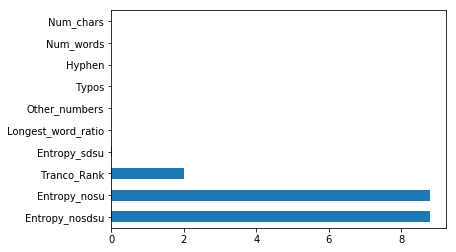

In [58]:
pd.Series(abs(svc.coef_[0]), index=X.columns).nlargest(10).plot(kind='barh')

In [59]:
svc.coef_

array([[-3.20340983e-04, -1.01057597e-04, -5.61028771e-04,
        -5.18768008e-03,  8.79340706e+00, -8.78641478e+00,
        -2.00187143e+00,  2.31415328e-03, -2.02467499e-03,
         0.00000000e+00, -2.05121148e-03]])

#### Undersampled in pipeline

In [ ]:
clf = make_pipeline_imb(RandomOverSampler(), StandardScaler(), SVC(verbose=1))
svc_sc = cross_validate(clf, X, y, cv=10, scoring=scoring)
svc_sc = append_avgs(svc_sc)

draw(svc_sc)

#### Compare averages

In [ ]:
compare_avgs(svc_sc, svc_sc_pr)

In [79]:
#ul = pd.read_csv('unlabeled_predictions.csv')
dtc_preds = pd.Series(dtc_preds, name='dtc_os')
rfc_preds = pd.Series(rfc_preds, name='rfc_os')
xgb_preds = pd.Series(xgb_preds, name='xgb_os')
gbc_preds = pd.Series(gbc_preds, name='gbc_os')
mlp_preds = pd.Series(mlp_preds, name='mlp_os')
svc_preds = pd.Series(svc_preds, name='svc_os')

In [80]:
df = pd.concat([dtc_preds, rfc_preds, xgb_preds, gbc_preds, mlp_preds, svc_preds], axis=1)
df.to_csv('unlabeled_predictions_oversampling.csv', index=False, header=True)

In [83]:
unlabeled.head()

,Num_words,Num_chars,Hyphen,Entropy_sdsu,Entropy_nosdsu,Entropy_nosu,Tranco_Rank,Longest_word_ratio,Typos,Freenom_TLD,Other_numbers
0,15,42,1,4.200703,2.725481,4.122694,0,0.136364,0,0,1
1,10,40,1,4.040080,2.725481,4.053610,1,0.261905,0,0,0
2,8,30,1,3.848885,3.680089,3.680089,0,0.354839,0,0,1
3,6,25,1,3.921030,3.754442,3.754442,0,0.423077,0,0,0
4,7,27,1,3.940760,3.772055,3.772055,0,0.392857,0,0,1
